In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def read_complex_bytev2(filename, M=-1):
    data = np.fromfile(filename, dtype=np.dtype('B'), count=M)
    normdata=(np.array(data, dtype=float)-127)/128
    normdata.dtype=complex
    return normdata

In [11]:
x = read_complex_bytev2('capture1.bin')
fs = 2e6

In [12]:
bs = 256  # batch size
overlap = 128  # corresponds to maximum timeshift
nbatches = int(np.floor((len(x)-overlap)/bs)) # number of batches

In [13]:
# Algorithm 3:

stmap = np.zeros((nbatches,overlap), dtype=complex)
for si in range(nbatches):
    # reference signal
    sig1 = x[si*bs: (si+1)*(bs)]
    # increase the lengh of reference signal by overlap
    sig1 = np.concatenate((sig1, np.zeros(overlap)), axis=0)

    # surveillance signal
    sig2 = x[si*bs: (si+1)*(bs) + overlap]

    # correlation
    xc = np.fft.ifft(np.fft.fft(sig1) * np.conj(np.fft.fft(sig2)))
    stmap[si, :] = xc[0:overlap]

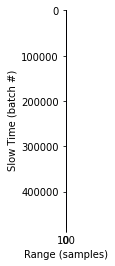

In [14]:
# plot the slow time correlation
plt.imshow(np.abs(stmap))
plt.xlabel('Range (samples)')
plt.ylabel('Slow Time (batch #)')
plt.show()

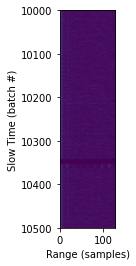

In [16]:
# plot the slow time correlation, to zoom in
plt.imshow(np.abs(stmap))
plt.xlabel('Range (samples)')
plt.ylabel('Slow Time (batch #)')
plt.ylim(10500, 10000)
plt.show()

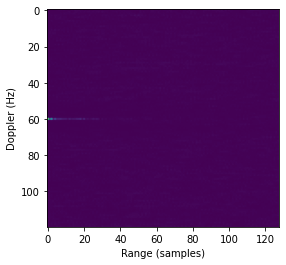

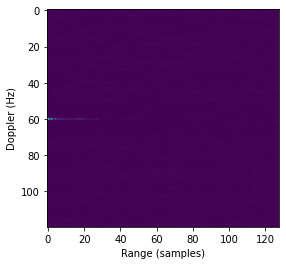

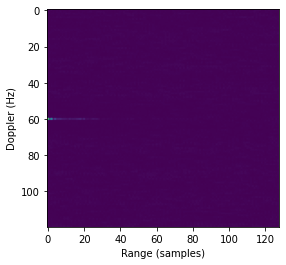

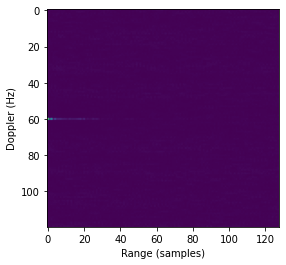

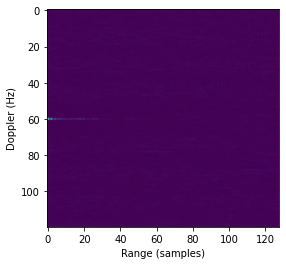

KeyboardInterrupt: 

In [18]:
for i in np.arange(0, nbatches, 60):

    # perform the fft for each column of of the slow time map
    batchSeg = stmap[i:i+120, :]
    batchShape = np.shape(batchSeg)
    stRDmap = np.zeros((batchShape[0], overlap), dtype=complex)
    
    for ri in np.arange(overlap):
	    stRDmap[:,ri] = np.fft.fftshift(np.fft.fft(batchSeg[:,ri]))

    # gridx = np.arange(0, overlap)
    # gridy = (np.arange(0, batchShape[0])/batchShape[0] - 0.5) *2*bs*0.75

    # plt.imshow(np.abs(stRDmap), extent=[np.min(gridx), np.max(gridx), np.min(gridy), np.max(gridy)], aspect='auto')
    plt.imshow(np.abs(stRDmap))
    plt.xlabel('Range (samples)')
    plt.ylabel('Doppler (Hz)')
    plt.show()